<a href="https://colab.research.google.com/github/zetawolfx2/Machine-learning-repo/blob/master/Model_for_Iris_Classification_(My_First_ML_Program).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

In [3]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
len(iris.data)

150

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Sepal size distribution')

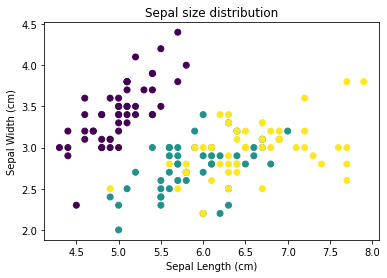

In [ ]:
# Select all rows and only first two columns (sepal length/width)
X = iris.data[:, :2]
 
# Target will be used to plot samples in different colors for different species
Y = iris.target
 
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal size distribution')

Text(0.5, 1.0, 'Petal size distribution (cm)')

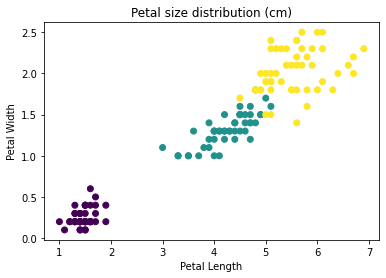

In [ ]:
# Select all rows and only last two columns (sepal length/width)
X = iris.data[:, 2:]

# Target will be used to plot samples in different colors for different species
Y = iris.target

plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal size distribution (cm)')

Text(0.5, 1.0, 'Parabola')

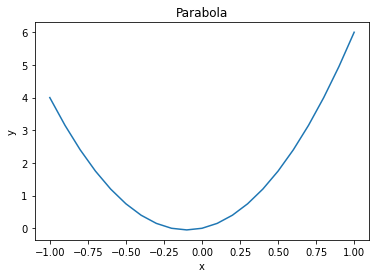

In [ ]:
def parabola(x):
    return 5*x**2 + x
 
def derivative(x):
  return 10*x + 1
 
x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parabola')

Estimated minimum -0.10, -0.05
Derivative (gradient) 0.00


Text(0.5, 1.0, 'Parabola')

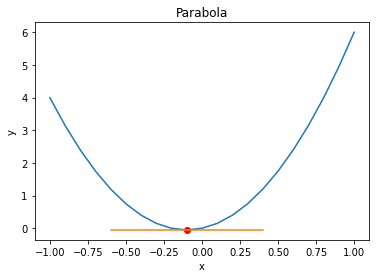

In [ ]:
x_k = 0.0
 
learning_rate = 0.1
epochs = 5
 
for i in range(epochs):
    gradient = derivative(x_k)
    x_k = x_k - learning_rate*gradient
 
print('Estimated minimum %0.2f, %0.2f' % (x_k, parabola(x_k)))
print('Derivative (gradient) %0.2f' % gradient)
 
x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_k, parabola(x_k), 'ro')
line_x = [x_k - 0.5, x_k + 0.5]
line_y = [gradient*(xi-x_k)+parabola(x_k) for xi in line_x]
plt.plot(line_x, line_y)
plt.title('Parabola')

#shows how derivatives are used to reduce gradients ---> This and above are reference cells

Text(0.5, 1.0, 'Logistic Sigmoid')

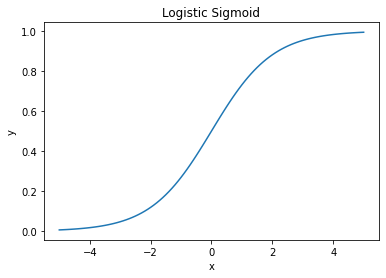

In [4]:
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

x = [i * 0.1 for i in range(-50, 51)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid') #Reference cell

In [5]:
#Prediction algorithm

def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
    
  result = result + bias
  return sigmoid(result)

In [6]:
#Loss function

def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

In [7]:
#Backpropagation algorithm

num_features = iris.data.shape[1]
 
def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0
 
  global bias, weights
 
  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

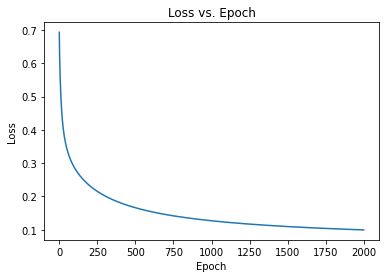

In [14]:
# Model will "learn" values for the weights and biases
 
weights = [0.0] * num_features
bias = 0.0
 
learning_rate = 0.1
epochs = 2000
 
x_train_samples = iris.data
y_train_samples = [1 if y == 2 else 0 for y in iris.target] #Change value here for different models (0 -> Iris Setosa, 1 -> Iris Versicolor, 2->Iris Virginica)
 
loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)
 
plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

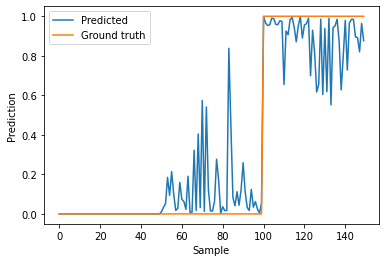

Accuracy: 98.00 %


In [15]:
#Testing the prediction algorithm

predictions = []
 
m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0
 
plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()
 
print('Accuracy: %.2f %%' % (100 * correct/m))

#Has Accuracy 100% for Iris Setosa
#Has Accuracy 72% for Iris Versicolor
#Has Accuracy 98% for Iris Virginica